In [1]:
from google.colab import files
uploaded = files.upload()


Saving News-_dataset.zip to News-_dataset.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("News-_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("news_data")

os.listdir("news_data")


['True.csv', 'Fake.csv']

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

true_df = pd.read_csv("news_data/True.csv")
fake_df = pd.read_csv("news_data/Fake.csv")

In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df = true_df.drop(['subject','date'],axis=1)
true_df.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [7]:
fake_df = fake_df.drop(['subject','date'],axis=1)
fake_df.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [8]:
true_df['label'] = 1
true_df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [9]:
fake_df['label'] = 0
fake_df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [10]:
news = pd.concat([true_df, fake_df], ignore_index=True)
news.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [11]:
news.shape

(44898, 3)

In [12]:
news.to_csv('news.csv')

In [13]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from string import punctuation
from nltk.corpus import stopwords
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [15]:
# removing news source info from text
def no_source(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text) #Extract the portion after (Reuters) -
    if regex:
        return regex.group(0)
    return text
df['text_no_source'] = df['text'].apply(no_source)

In [16]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()


,title,text,label,text_no_source
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,President Donald Trump called on the U.S. Post...


In [17]:
#combining text_no_source and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_no_source']
df.head()

,title,text,label,text_no_source,final_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,The head of a conservative Republican faction ...,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,Transgender people will be allowed for the fir...,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,The special counsel investigation of links bet...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,Trump campaign adviser George Papadopoulos tol...,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,President Donald Trump called on the U.S. Post...,Trump wants Postal Service to charge 'much mor...


In [18]:
# deleting unecessary columns
col =['title','text','text_no_source']
df = df.drop(col,axis=1)
df.head()

,label,final_news
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


# Cleaning the article by:
Removing stopwords

Lowercasing all text

Removing non-alphabet characters

In [19]:
#Stopwords are words like "the", "is" etc.,don’t carry meaningful information.
#so removing them helps reduce noise in the text.
stop = stopwords.words('english')

def cleanText(txt):
    txt = txt.lower() #Converting all characters to lowercase.

    txt = ' '.join([word for word in txt.split() if word not in (stop)]) #Removing stopwords from the text

    txt = re.sub('[^a-z]',' ',txt) #Removing all non-alphabetic characters
    return txt


In [20]:
#applying this function to final_news
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
0,1,u s budget fight looms republicans flip fisc...
1,1,u s military accept transgender recruits mond...
2,1,senior u s republican senator let mr muell...
3,1,fbi russia probe helped australian diplomat ti...
4,1,trump wants postal service charge much more ...


In [21]:
# Download GloVe from Stanford
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Unzip it
!unzip glove.6B.zip


--2025-04-21 06:42:56--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-21 06:42:56--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-21 06:42:57--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [22]:
#GloVe stands for Global Vectors for Word Representation.
#It’s a pre-trained word embedding model developed by Stanford that helps machines understand the meaning of words based on how they appear in real-world text.
EMBEDDING_FILE=f'glove.6B.50d.txt'

# Maximum number of words (tokens) in each input sequence (news article).
# If a text has fewer than 100 words, it will be padded; if more, it will be truncated.
MAX_SEQUENCE_LENGTH = 100

# Limit the size of the vocabulary to the 20,000 most frequent words in the dataset.
# Helps reduce computational cost and avoid noise from rare words.
MAX_VOCAB_SIZE = 20000

# This defines the size of each word vector that the model will use.
EMBEDDING_DIM = 50


VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10

In [23]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [24]:
y.shape

(44898,)

In [25]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {} #empty dictionary to store every word and its corresponding vector.
with open(EMBEDDING_FILE) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f: # Read the file line by line
    # Split each line into the word and its numerical vector components
    values = line.split()

    # The first element is the word (e.g., 'king')
    word = values[0]

    # The remaining elements are the 50-dimensional word vector
    vec = np.asarray(values[1:], dtype='float32')

    # Store the word and its vector in the dictionary
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [26]:
# Convert text to sequences of integers using Keras Tokenizer
# Only the top MAX_VOCAB_SIZE most common words will be considered
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)

# Fit the tokenizer on the cleaned news text (learn word-to-index mapping)
tokenizer.fit_on_texts(list(X['final_news']))

# Convert each news article into a sequence of integers (one integer per word)
X = tokenizer.texts_to_sequences(list(X['final_news']))

# Pad all sequences to the same length so they can be input into the LSTM
# Sequences shorter than MAX_SEQUENCE_LENGTH will be zero-padded
# Sequences longer than MAX_SEQUENCE_LENGTH will be truncated
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [27]:
# Create a dictionary that maps each word to its corresponding integer ID
# This was learned from the tokenizer when we fit it on the text
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 115831 unique tokens.


In [28]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')

# Total number of words to include: the smaller of our vocab size or actual word count
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)

# Initialize the embedding matrix with zeros
# Shape: (num_words, EMBEDDING_DIM) = (e.g., 20000, 50)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Loop through each word and its index
for word, i in word2idx.items():

  # Only include words within our vocab size
  if i < MAX_VOCAB_SIZE:

    # Get the GloVe vector for the word (if available)
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:

      # If the word is found in GloVe, store its vector in the matrix
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [29]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words, # Number of unique words in our vocab (rows in embedding matrix)
  EMBEDDING_DIM, # Each word will be represented as a vector of this size (e.g., 50)
  weights=[embedding_matrix], # Use our pre-trained embedding matrix from GloVe
  input_length=MAX_SEQUENCE_LENGTH, # Each input sequence has this fixed length
  trainable=False # Set to False so the GloVe vectors stay fixed during training
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Building model

In [30]:
# Define the input layer to accept sequences of fixed length (word indices)
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))

# Pass the input through the embedding layer to get word vectors
x = embedding_layer(input_)

# Add a bidirectional LSTM layer (reads input forwards and backwards)
x = Bidirectional(LSTM(15, return_sequences=True))(x)

# Apply Global Max Pooling to reduce the LSTM output to the most important features
x = GlobalMaxPool1D()(x)

# Final output layer with 1 neuron and sigmoid activation (for binary classification)
output = Dense(1, activation="sigmoid")(x)

# Create the model from input to output
model = Model(input_, output)

# Compile the model with binary cross-entropy loss and the Adam optimizer
model.compile(
  loss='binary_crossentropy',  # Best for binary classification
  optimizer='adam',            # Optimizer that adapts learning rate automatically
  metrics=['accuracy']         # Track accuracy as a performance metric
)

# Print a summary of the model architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 50)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 30)        │         7,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 30)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,007,951 (3.85 MB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

# Training model

In [32]:
r = model.fit(
    X_train,                 # Training features
    y_train,                 # Training labels
    batch_size=BATCH_SIZE,  # Number of samples per gradient update
    epochs=EPOCHS,           # Total number of training iterations over the dataset
    validation_split=VALIDATION_SPLIT  # Portion of training data used for validation
)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 63s 63ms/step - accuracy: 0.8591 - loss: 0.3489 - val_accuracy: 0.9492 - val_loss: 0.1550
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - accuracy: 0.9458 - loss: 0.1420 - val_accuracy: 0.9575 - val_loss: 0.1173
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.9660 - loss: 0.1000 - val_accuracy: 0.9685 - val_loss: 0.0887
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.9725 - loss: 0.0778 - val_accuracy: 0.9694 - val_loss: 0.0854
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.9761 - loss: 0.0668 - val_accuracy: 0.9761 - val_loss: 0.0681
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.9819 - loss: 0.0537 - val_accuracy: 0.9795 - val_loss: 0.0616
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.9847 - loss: 0.0453 - val_accuracy: 0.9783 - val_loss: 0.0617
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9885 - loss: 0.0378 - 

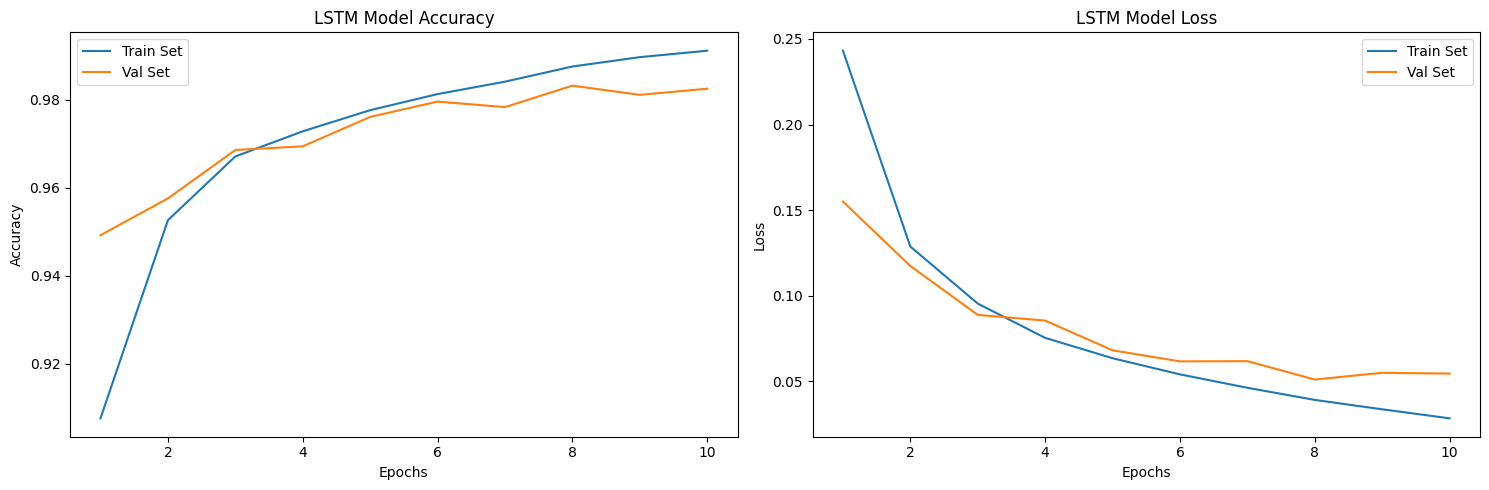

In [33]:
# Extract accuracy and loss history for both training and validation
acc = r.history['accuracy']            # Accuracy on training set
val_acc = r.history['val_accuracy']    # Accuracy on validation set
loss = r.history['loss']               # Loss on training set
val_loss = r.history['val_loss']       # Loss on validation set
epochs_range = range(1, len(r.epoch) + 1)  # Epoch numbers for x-axis

# Set figure size
plt.figure(figsize=(15,5))

# Plot Accuracy
plt.subplot(1, 2, 1)  # First subplot: Accuracy
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)  # Second subplot: Loss
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [34]:
# Evaluate accuracy on training data
print("Accuracy of the model on Training Data is - ", model.evaluate(X_train, y_train)[1] * 100)

# Evaluate accuracy on testing data (unseen data)
print("Accuracy of the model on Testing Data is - ", model.evaluate(X_test, y_test)[1] * 100)


1123/1123 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9907 - loss: 0.0305
Accuracy of the model on Training Data is -  98.89470338821411
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9828 - loss: 0.0512
Accuracy of the model on Testing Data is -  98.2293963432312


In [36]:
# Predict probabilities for the test data using the trained model
pred = model.predict(X_test)

# Display the first 5 prediction probabilities
pred[:15]


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


array([[2.1722531e-02],
       [1.9503689e-04],
       [9.9979496e-01],
       [2.2193925e-01],
       [1.9559058e-05],
       [9.9765617e-01],
       [2.5858439e-04],
       [9.9987853e-01],
       [9.9299854e-01],
       [9.9974680e-01],
       [2.6883039e-04],
       [9.8256028e-01],
       [5.4798842e-05],
       [2.5654783e-05],
       [9.9620116e-01]], dtype=float32)

In [37]:
# Convert probabilities to class labels (0 = fake, 1 = real)
pred_class = (pred > 0.5).astype(int)

# Show first 5 class predictions
pred_class[:15]


array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1]])

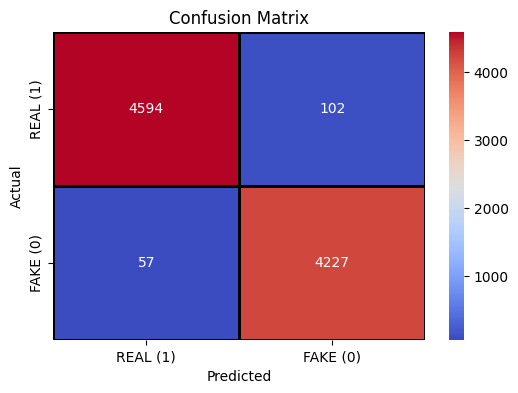

In [38]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred.round())

# Convert it to a DataFrame with correctly labeled classes
cm = pd.DataFrame(cm, index=['REAL (1)', 'FAKE (0)'], columns=['REAL (1)', 'FAKE (0)'])

# Set up the figure size for the heatmap
plt.figure(figsize=(6, 4))

# Plot the heatmap
sns.heatmap(cm, cmap="coolwarm", linecolor='black', linewidth=1, annot=True, fmt='',
            xticklabels=['REAL (1)', 'FAKE (0)'],
            yticklabels=['REAL (1)', 'FAKE (0)'])

# Add axis labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Evaluation Metrics

In [39]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4696
           1       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, roc_curve
import numpy as np



# Accuracy

In [41]:
accuracy = accuracy_score(y_test, pred_class)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9823


# AUC

In [42]:
auc = roc_auc_score(y_test, pred)
print(f"AUC: {auc:.4f}")

AUC: 0.9984


# Precision

In [43]:
precision = precision_score(y_test, pred_class)
print(f"Precision: {precision:.4f}")

Precision: 0.9764


# EER

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(f"EER (Equal Error Rate): {eer:.4f}")

EER (Equal Error Rate): 0.0162


# Model prediction

In [45]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    testX = pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX) #predicts using the LSTM Model we built earlier
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction'] = df_test['prediction'].apply(lambda x: "Real" if x >= 0.5 else "False")
    return df_test
testSent = [
    "India launches a new space mission aimed at exploring the moon’s south pole region for scientific research.",
    "Doctors confirm that drinking three cans of soda a day will make you immune to COVID-19.",
    "Germany's chancellor pledged more aid to Ukraine during a joint press conference with the French president.",
    "Aliens land in Nevada desert, government covers up the incident and silences witnesses.",
    "U.S. President signs new trade agreement with European Union to boost economic growth and cooperation."
]
df_testsent = predict_text(testSent)
df_testsent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


,test_sent,prediction
0,india launches new space mission aimed explori...,Real
1,doctors confirm drinking three cans soda day m...,False
2,germany s chancellor pledged aid ukraine joint...,False
3,aliens land nevada desert government covers i...,False
4,u s president signs new trade agreement europ...,Real
